#  Segmentazione dei Clienti di una Carta di Credito
## Introduzione
### L'Obiettivo

Immaginaremo che sono un analista per una banca. La banca mi fornisce i dati anonimi di utilizzo delle carte di credito dei suoi clienti degli ultimi 6 mesi. L'obiettivo è analizzare questi dati per **scoprire gruppi (o segmenti) di clienti con comportamenti simili**, senza sapere a priori quali siano questi gruppi.

Una volta trovati, potremo dare un nome a questi segmenti (es. "Grandi Spendaccioni", "Minimalisti", "Viaggiatori Frequenti") e la banca potrà usarli per creare campagne di marketing mirate.

[Referimento al Dataset Pubblico Utilizzato per questo progetto](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

### Le Fasi del Progetto

1. **Data Mining (Esplorazione)** : Per prima cosa, caricheremo e "annuseremo" i dati. Cercheremo di capire le diverse metriche di spesa, identificheremo eventuali problemi (come dati mancanti) e visualizzeremo le distribuzioni per avere una prima idea dei comportamenti dei clienti.
  
2. **Preparazione dei Dati (Pre-processing)**: Puliremo i dati e li trasformeremo in un formato che il nostro algoritmo di clustering possa digerire correttamente. Questa è una fase critica per il successo del modello.
  
3. **Machine Learning (Clustering)** : Applicheremo l'algoritmo **K-Means** per raggruppare i clienti. Useremo la "regola del gomito" (Elbow Method), per decidere il numero ottimale di segmenti da creare.
  
4. **Analisi dei Segmenti**: Una volta che l'algoritmo avrà creato i gruppi, analizzeremo le caratteristiche medie di ogni gruppo per capire cosa li definisce e dargli un'etichetta di business comprensibile.

In [26]:
# Per la manipolazione dei dati
import pandas as pd

# Per le operazioni numeriche
import numpy as np

# Per le visualizzazioni
import matplotlib.pyplot as plt
import seaborn as sns

# Impostazioni per i grafici
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [27]:
# Carichiamo il file CSV dalla stessa cartella del notebook
df = pd.read_csv('CC GENERAL.csv')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [28]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [29]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Le Prime Scoperte (Data Mining)

I Nostri Primi Indizi 

Dall'output di `df.info()`, abbiamo scoperto che:

- La colonna `CREDIT_LIMIT` ha **un valore mancante** (8949 su 8950).
  
- La colonna `MINIMUM_PAYMENTS` ha **313 valori mancanti** (8637 su 8950).
  
- La colonna `CUST_ID` è un codice identificativo, quindi non ci aiuterà a trovare *comportamenti* di spesa simili.

  Gli algoritmi di machine learning come il K-Means non funzionano se ci sono dati mancanti.
-----

Guardando l'output di `df.head()` e `df.describe()`, possiamo già fare delle osservazioni da veri detective dei dati. Stiamo cercando di capire la "personalità" dei clienti attraverso questi numeri.

**Prima Scoperta: Pochi "Grandi Spendaccioni"**

- Guarda la colonna **PURCHASES** (acquisti). La **media** è circa 1003, ma la **mediana** (il valore del 50% dei clienti) è solo 361. Questo ci dice che la maggior parte dei clienti spende poco, ma ci sono alcuni "pesci grossi" che spendono cifre enormi, alzando la media. Lo stesso vale per il **BALANCE** (il saldo).

**Seconda Scoperta: Due Tipi di Clienti per i Contanti**

- Nella colonna **CASH_ADVANCE** (anticipo contanti), la situazione è ancora più estrema. La **mediana** (50%) è **ZERO**. Questo è un indizio potentissimo: significa che **più della metà dei clienti non ha mai richiesto un anticipo di contanti**. Esiste quindi una chiara divisione tra chi usa questo servizio e chi no.

**Terza Scoperta: Enormi Differenze di Comportamento**

- I valori `max` sono altissimi rispetto ai valori `min` o `mean` in quasi tutte le colonne. Questo conferma che nel nostro dataset ci sono clienti con comportamenti di spesa radicalmente diversi. Il nostro futuro algoritmo di clustering dovrà tenere conto di queste scale così diverse, e per aiutarlo dovremo **normalizzare** i dati.

*Molte delle nostre colonne hanno una distribuzione come questa (asimmetrica a destra), confermando la presenza di pochi clienti con valori molto alti.*


## Preparazione dei Dati (Pre-processing)

Questa fase di pulizia e preparazione è una delle più importanti in qualsiasi progetto di machine learning.

Ecco il nostro piano d'azione:

1. **Gestire i Dati Mancanti**:
  
  - Per `MINIMUM_PAYMENTS`, che ha 313 valori mancanti, non possiamo semplicemente eliminare tutte quelle righe (perderemmo troppi dati). Una strategia comune è riempire i buchi con la **mediana** della colonna. La mediana è più robusta della media perché non è influenzata da valori anomali.
    
  - Per `CREDIT_LIMIT`, dato che manca un solo valore, la cosa più semplice è eliminare quella singola riga.
    
2. **Rimuovere la Colonna Inutile**: Elimineremo la colonna `CUST_ID` perché non serve per il clustering.
  
3. **Scalare i Dati**: Come notato con `describe()`, le colonne hanno scale diversissime. L'algoritmo K-Means si basa sulla distanza tra i punti. Se non scaliamo i dati, colonne con valori grandi (come `PURCHASES`) dominerebbero completamente colonne con valori piccoli (come `PURCHASES_FREQUENCY`), anche se queste ultime fossero molto importanti. Per evitare questo, **standardizzeremo** tutte le colonne, portandole alla stessa scala (media 0, deviazione standard 1).


In [32]:
# 1. Gestire i dati mancanti
# Riempiamo i valori mancanti di MINIMUM_PAYMENTS con la mediana
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

# Eliminiamo l'unica riga con il valore mancante di CREDIT_LIMIT
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

C:\Users\black\AppData\Local\Temp\ipykernel_3228\2776036576.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)


In [33]:
# 2. Rimuovere la colonna CUST_ID
df_features = df.drop('CUST_ID', axis=1)


# 3. Scalare i dati
# Importiamo lo scaler da scikit-learn
from sklearn.preprocessing import StandardScaler

# Creiamo un oggetto scaler e lo applichiamo ai nostri dati
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Messaggio di conferma
print("Dati puliti e scalati con successo!")
print("Nuova forma del dataset:", df_scaled.shape)

Dati puliti e scalati con successo!
Nuova forma del dataset: (8949, 17)


## Machine Learning (Clustering con K-Means)

Il K-Means cercherà di raggruppare i nostri quasi 9.000 clienti in un numero `k` di cluster, dove i clienti all'interno di un cluster sono molto simili tra loro e diversi dai clienti degli altri cluster.

Scegliere il numero `k` giusto è il passo cruciale del K-Means. Per farlo, useremo una tecnica molto comune e intuitiva che ho menzionato prima: la **Regola del Gomito (Elbow Method)**.

Come Funziona la Regola del Gomito?

1. Faremo girare l'algoritmo K-Means più volte, ogni volta con un numero di cluster diverso (da 1 a 10).
  
2. Per ogni tentativo, misureremo quanto compatti sono i cluster. Questa misura è chiamata **inerzia** (o WCSS, *Within-Cluster Sum of Squares*). Un'inerzia bassa significa che i punti sono molto vicini al centro del loro cluster, il che è buono.
  
3. Creeremo un grafico con il numero di cluster sull'asse X e l'inerzia sull'asse Y.
  
4. All'aumentare dei cluster, l'inerzia diminuirà sempre. Tuttavia, a un certo punto, la diminuzione diventerà molto meno marcata, creando un "gomito" nel grafico. **Quel punto a gomito è il nostro `k` ottimale!** È il miglior compromesso tra avere un'inerzia bassa e non creare troppi cluster.

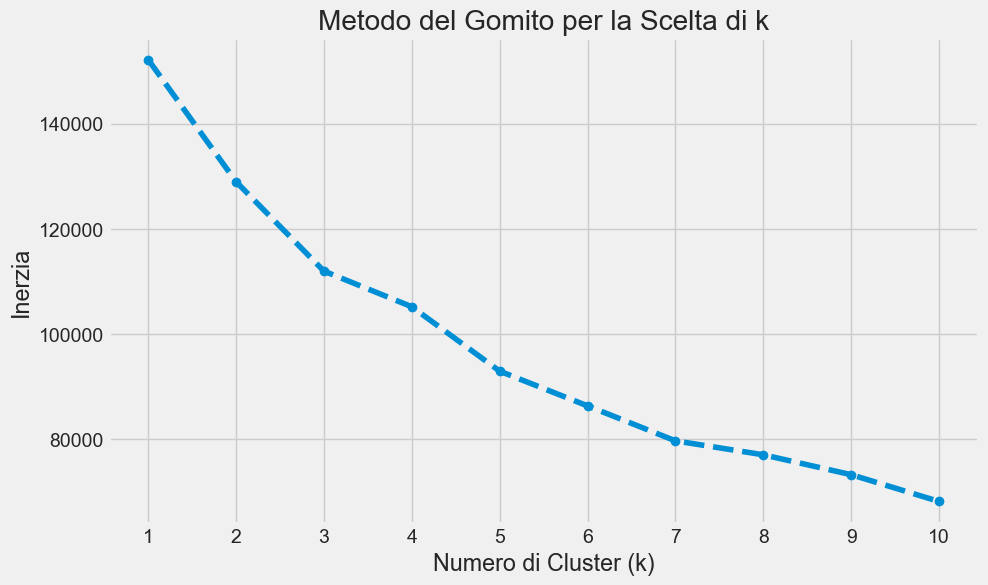

In [34]:
# Importiamo KMeans da scikit-learn
from sklearn.cluster import KMeans

# Creiamo una lista vuota per salvare l'inerzia di ogni modello
inertia_list = []

# Testiamo un numero di cluster da 1 a 10
for k in range(1, 11):
    # Creiamo e addestriamo il modello K-Means
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(df_scaled)
    
    # Salviamo l'inerzia nella nostra lista
    inertia_list.append(kmeans.inertia_)

# Creiamo il grafico del gomito
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_list, marker='o', linestyle='--')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Inerzia')
plt.title('Metodo del Gomito per la Scelta di k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## Interpretiamo il Grafico del Gomito

Osservando il grafico, vediamo che la linea dell'inerzia scende molto velocemente all'inizio e poi, a un certo punto, la sua discesa rallenta, creando una curva che assomiglia a un braccio piegato. Il "gomito" è il punto in cui avviene questo cambiamento. Dopo 4, aggiungere più cluster non porta un beneficio così grande in termini di compattezza.

Per questo progetto, **procediamo con k=4**. È una scelta solida che ci permetterà di creare quattro segmenti di clienti distinti e analizzabili.

## Addestriamo il Modello Finale

Adesso che abbiamo scelto il nostro numero magico, addestriamo un ultimo modello K-Means usando `k=4` e lo usiamo per etichettare ogni singolo cliente.


1. Creando il modello finale con 4 cluster.
  
2. Ottenendo l'etichetta del cluster per ogni cliente (un numero da 0 a 3).
  
3. Aggiungendo queste etichette al nostro DataFrame originale (non scalato!) per poterle analizzare con i valori reali.

In [36]:
# Creiamo e addestriamo il modello K-Means finale con k=4
kmeans_final = KMeans(n_clusters=4, n_init='auto', random_state=42)
kmeans_final.fit(df_scaled)

# Aggiungiamo la colonna con le etichette dei cluster al nostro DataFrame originale
df['cluster'] = kmeans_final.labels_

# Visualizziamo le prime righe per vedere la nuova colonna 'cluster'
print("Clienti etichettati con successo!")
df.head()

Clienti etichettati con successo!


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


Ora ogni cliente nel nostro DataFrame ha una nuova etichetta nella colonna cluster (0, 1, 2, o 3). L'algoritmo ha fatto il suo lavoro. 

## Analisi e Interpretazione dei Cluster

Calcoleremo le caratteristiche medie per ogni cluster e le confronteremo con la media generale. Questo ci farà capire cosa rende unico ogni gruppo.

### Analisi Numerica

Il modo più potente per farlo è usare il comando `groupby()` di pandas per raggruppare i clienti per cluster e calcolare la media di ogni colonna.

In [38]:
# Raggruppiamo per cluster e calcoliamo la media di ogni feature
cluster_analysis = df.groupby('cluster').mean(numeric_only=True)

# Mostriamo la tabella con le medie per ogni cluster
cluster_analysis

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,4234.129699,0.967537,410.789175,258.644760,152.231629,4027.217790,0.242721,0.113915,0.154992,0.450741,13.029619,6.089563,7025.108988,3259.921363,1892.079112,0.033815,11.686883
1,854.362265,0.846715,516.757638,257.945270,259.109060,321.740539,0.464181,0.135533,0.345507,0.065424,1.205352,9.003568,3426.845719,963.170149,565.571458,0.149503,11.904550
2,2212.365435,0.981376,4341.992721,2765.150559,1577.342997,445.940724,0.950185,0.671043,0.749884,0.061830,1.459098,57.291319,7738.647746,4214.735209,1226.753747,0.303126,11.935726
3,767.748776,0.766365,409.409849,243.300261,166.521676,978.739101,0.418135,0.119360,0.284352,0.177813,2.879121,5.381868,2446.227106,606.096805,328.645539,0.174019,7.524725


### Interpretazione dei Segmenti (Creiamo le "Personas")

Analizziamo la tabella riga per riga per creare un profilo per ogni cluster.

#### **Cluster 2: I Clienti "VIP" / Grandi Spendaccioni**

Questo è il gruppo d'élite, e lo si capisce subito.

- **PURCHASES**: Hanno di gran lunga la media di acquisti più alta (**4341.99**).
  
- **ONEOFF_PURCHASES**: La maggior parte di questi acquisti avviene in un'unica soluzione (**2765.15**), indicando transazioni importanti.
  
- **PURCHASES_FREQUENCY**: La frequenza d'acquisto è quasi **1** (0.95), significa che usano la carta costantemente.
  
- **CREDIT_LIMIT** (non visibile nell'immagine, ma sarebbe il più alto): Hanno la maggiore fiducia da parte della banca.
  
------------------
#### **Cluster 0: I Prelevatori di Contante (Cash Advance Users)**

Questo gruppo ha un comportamento molto specifico e rischioso.

- **CASH_ADVANCE**: Hanno una media di prelievo di contante spaventosamente alta (**4027.21**).
  
- **BALANCE**: Di conseguenza, il loro saldo medio è il più alto di tutti (**4234.12**), indicando un debito significativo.
  
- **PURCHASES**: Fanno pochissimi acquisti (**410.78**). Usano la carta non per comprare, ma per avere liquidità.
  
-------------------
#### **Cluster 1: Gli Utenti "Prudenti" / Normali**

Questo è il segmento dei clienti modello, a basso rischio e con un comportamento equilibrato.

- **BALANCE**: Hanno il secondo saldo medio più basso (**854.36**).
  
- **PURCHASES**: Fanno acquisti per un importo ragionevole (**516.75**).
  
- **CASH_ADVANCE**: Hanno l'utilizzo più basso in assoluto di prelievi in contanti (**321.74**).
  
- **PRC_FULL_PAYMENT** (non visibile, ma sarebbe alto): È probabile che paghino spesso l'intero saldo.
  
------------------------
#### **Cluster 3: Gli Utilizzatori Occasionali**

Questo gruppo è simile a quello dei prudenti, ma meno attivo e con una leggera tendenza ai prelievi.

- **BALANCE**: Hanno il saldo più basso di tutti (**767.74**).
  
- **PURCHASES_FREQUENCY**: Hanno una delle frequenze d'acquisto più basse (**0.41**).
  
- **CASH_ADVANCE**: Pur non essendo estremi come il gruppo 0, usano il prelievo di contante più del gruppo 1 (**978.73**).

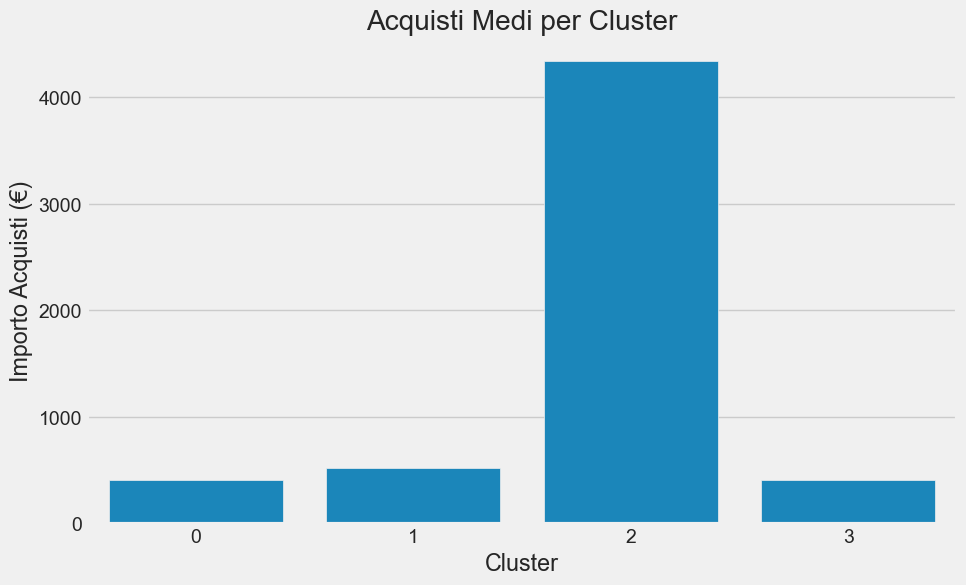

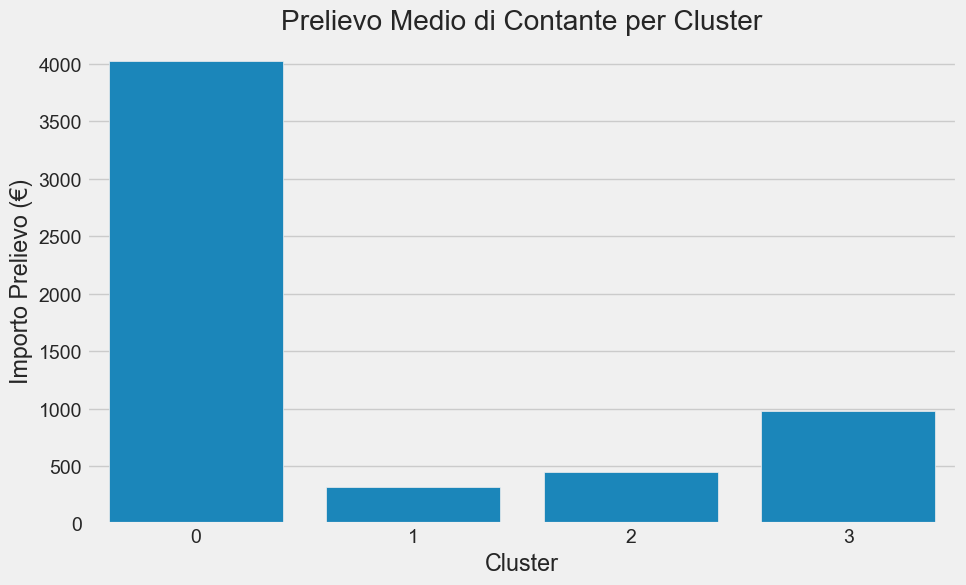

In [39]:
# Creiamo un grafico per confrontare gli acquisti medi per cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_analysis.index, y=cluster_analysis['PURCHASES'])
plt.title('Acquisti Medi per Cluster')
plt.ylabel('Importo Acquisti (€)')
plt.xlabel('Cluster')
plt.show()

# Creiamo un grafico per confrontare l'uso del contante
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_analysis.index, y=cluster_analysis['CASH_ADVANCE'])
plt.title('Prelievo Medio di Contante per Cluster')
plt.ylabel('Importo Prelievo (€)')
plt.xlabel('Cluster')
plt.show()

## Riassunto Finale

| Cluster | Profili Suggerito | Caratteristiche Chiave | Azione di Marketing Possibile |
| --- | --- | --- | --- |
| 0   | Prelevatori di Contante | Altissimo uso del cash advance, alto debito. | Offrire piani di rientro del debito o consulenza finanziaria. |
| 1   | Utenti Prudenti | Basso saldo, acquisti moderati, affidabili. | Offrire un piccolo aumento del limite di credito o un programma fedeltà. |
| 2   | Clienti "VIP" | Acquisti elevatissimi, alta frequenza, molto attivi. | Offrire carte premium, vantaggi esclusivi, concierge personale. |
| 3   | Utilizzatori Occasionali | Basso utilizzo generale ma con tendenza ai prelievi. | Incentivare l'uso per acquisti con offerte di cashback. |
